# Resume Role Classifier and Scoring Model Training

This notebook demonstrates the process of training a machine learning model to classify resumes by job role and to score resumes based on relevant keywords. The data is loaded from the data folder dataset.

# Step 1: Import Libraries

In [12]:

import pandas as pd
import numpy as np
import joblib
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix

## Step 2: Load and Preview Dataset

Load the resume dataset for model training.

In [ ]:
df = pd.read_csv("../data/UpdatedResumeDataSet.csv")
df = df[['Resume', 'Category']]
df.head()

,Resume,Category
0,Skills * Programming Languages: Python (pandas...,Data Science
1,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science
2,"Areas of Interest Deep Learning, Control Syste...",Data Science
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science
4,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science


## Step 3: Text Preprocessing

Clean the resume text for modeling.

In [14]:
def clean_text(text):
    """Remove URLs, non-alphabetic characters, and extra spaces."""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower().strip()
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)
df.head()

,Resume,Category,Cleaned_Resume
0,Skills * Programming Languages: Python (pandas...,Data Science,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science,education details may to may be uitrgpv data s...
2,"Areas of Interest Deep Learning, Control Syste...",Data Science,areas of interest deep learning control system...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science,skills r python sap hana tableau sap hana sql ...
4,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science,education details mca ymcaust faridabad haryan...


## Step 4: Encode Target Labels

In [15]:
le = LabelEncoder()
df['Encoded_Category'] = le.fit_transform(df['Category'])

## Step 5: Vectorization

Convert text to TF-IDF features.

In [16]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Cleaned_Resume']).toarray()
y = df['Encoded_Category']

## Step 6: Train Classifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 7: Evaluate Classifier

Print classification report and plot confusion matrix.

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  

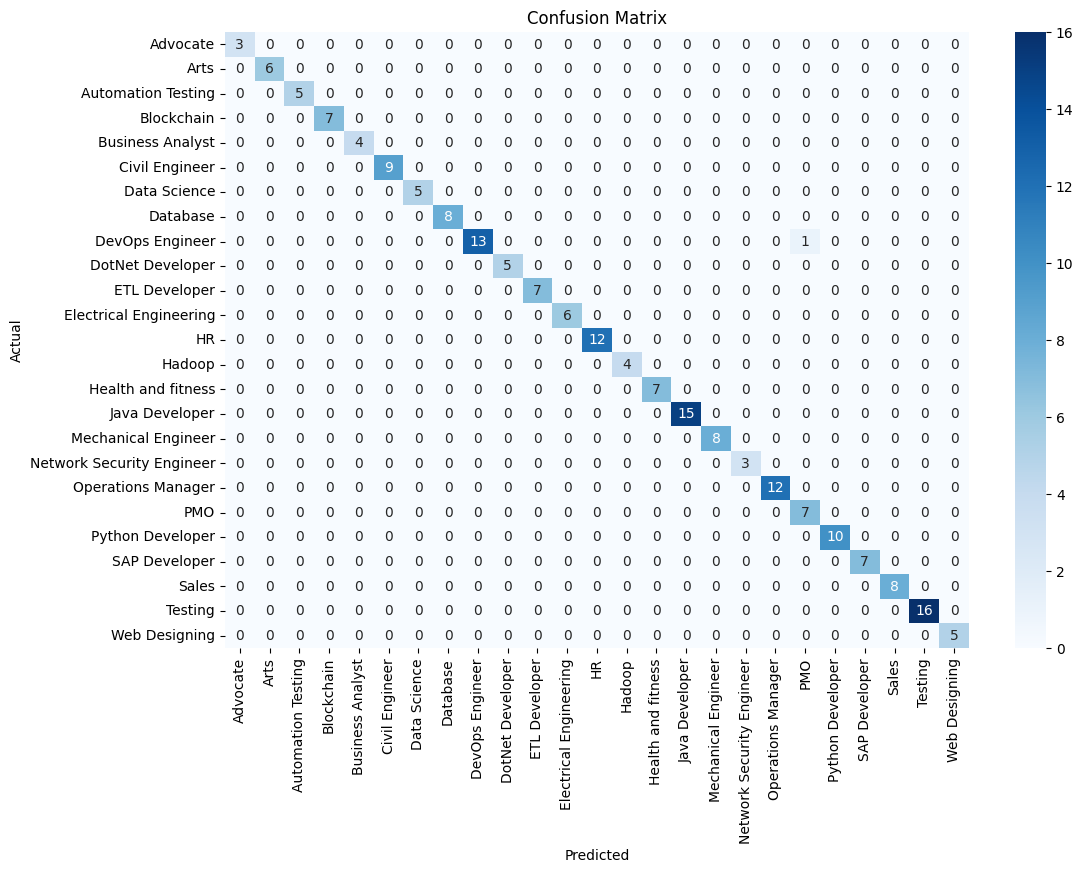

In [18]:
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Step 8: Save Classifier and Vectorizer

In [19]:
import os
model_dir = "../model"
os.makedirs(model_dir, exist_ok=True)
joblib.dump(classifier, os.path.join(model_dir, "classifier.pkl"))
joblib.dump(vectorizer, os.path.join(model_dir, "vectorizer.pkl"))
joblib.dump(le, os.path.join(model_dir, "label_encoder.pkl"))
print("Models saved successfully to '../model/'")

Models saved successfully to '../model/'


## Step 9: Train Resume Scoring Model (Regression)

Create a score based on keyword count for demonstration.

In [20]:
def calculate_score(resume):
    """Count occurrences of key terms for a synthetic score."""
    keywords = ['python', 'data', 'project', 'ml', 'ai', 'sql', 'analysis']
    score = sum([resume.lower().count(kw) for kw in keywords])
    return score
df['Score'] = df['Resume'].apply(calculate_score)

In [21]:
y_score = df['Score']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_score, test_size=0.2, random_state=42)
scorer_model = RandomForestRegressor()
scorer_model.fit(X_train_s, y_train_s)

RandomForestRegressor()

## Step 10: Evaluate and Save Scorer Model

Plot feature importances.

Resume Score RMSE: 1.0207091408717115


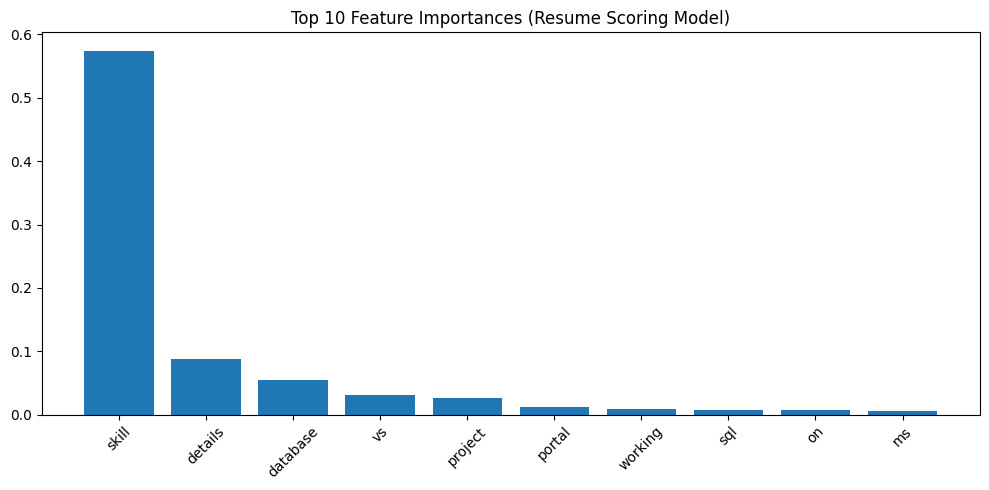

['../model\\scorer_model.pkl']

In [22]:
pred_score = scorer_model.predict(X_test_s)
print("Resume Score RMSE:", np.sqrt(mean_squared_error(y_test_s, pred_score)))
# Feature importance plot
importances = scorer_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(10,5))
plt.title('Top 10 Feature Importances (Resume Scoring Model)')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
joblib.dump(scorer_model, os.path.join(model_dir, "scorer_model.pkl"))